In [2]:
%pip install numpy matplotlib


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
import numpy as np

NUM_STEPS = 1000
NUM_RUNS = 2000

def run_k_bandit_experiment(k, epsilon, alpha=None, initial_value: float | None = None):
    all_rewards = np.zeros((NUM_RUNS, NUM_STEPS))
    all_actions = np.zeros((NUM_RUNS, NUM_STEPS))

    for run in range(NUM_RUNS):
        # True action values for this run (sampled once per run)
        q_true = np.random.normal(loc=0, scale=1, size=k)

        Q = np.ones(k) * initial_value if initial_value else np.zeros(k) # average reward for each action within a given run
        N = np.zeros(k) # number of times each action has been taken within a given run
        for step in range(NUM_STEPS):
            if np.random.rand() < epsilon:
                # explore
                action = np.random.randint(0, k)
            else:
                # exploit
                action = np.argmax(Q)
            
            all_actions[run, step] += 1 if action == np.argmax(q_true) else 0
            
            reward = np.random.normal(loc=q_true[action], scale=1)
            all_rewards[run, step] = reward
            # update the number of times the action has been taken
            N[action] += 1
            # updates the current reward for action TOWARDS the sampled reward by calculating the sample-average
            Q[action] += (reward - Q[action]) /(N[action] if not alpha else 1/alpha)

    return all_rewards.mean(axis=0), all_actions.mean(axis=0)

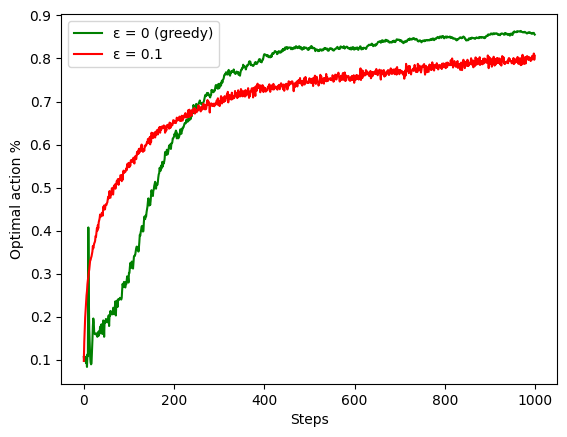

In [10]:
import matplotlib.pyplot as plt

k = 10

for eps, initial_value, alpha, color in [(0, 5, 0.1, 'green'), (0.1, None, None, 'red')]:
    avg_rewards, avg_action_choices = run_k_bandit_experiment(k, eps, alpha, initial_value)
    label = f'ε = {eps}' if eps > 0 else 'ε = 0 (greedy)'

    # Plot % optimal action taken
    plt.figure(1)
    plt.plot(avg_action_choices, color=color, label=label)
    plt.xlabel('Steps')
    plt.ylabel('Optimal action %')
    plt.legend()
